<a href="https://colab.research.google.com/github/anishdulal/Sentiment-Analysis-with-Logistic-Regression/blob/master/LogisticRegressionSentimentAnalysis4thMarchalmostdone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#open('/content/gdrive/My Drive/sentiment.csv')
df = pd.read_csv(open('/content/gdrive/My Drive/sentiment.csv'))
#df = pd.read_csv('sentiment.csv')
df.head()

,Phrase,label
0,Spider-man is better than any summer blockbust...,Positive
1,of good sense,Positive
2,", then knock yourself out and enjoy the big sc...",Negative
3,So could young romantics out on a date .,Positive
4,humour,Positive


In [3]:
len(df)
#X = df['Phrase'].values
#y = df['label'].values

2800

In [4]:
total = len(df)
train = int(0.6 * total)
val = int(0.2*total)

train_df = df[:train]
#y_train = y[:train].reshape(-1,1)

val_df = df[train:train + val]
#y_val = y[train:train +val].reshape(-1,1)

test_df = df[train + val:]
#y_test = y[train + val:].reshape(-1,1)

print(len(train_df), len(val_df),len(test_df))

1680 560 560


In [5]:
train_df.head()

,Phrase,label
0,Spider-man is better than any summer blockbust...,Positive
1,of good sense,Positive
2,", then knock yourself out and enjoy the big sc...",Negative
3,So could young romantics out on a date .,Positive
4,humour,Positive


In [6]:
vocab = list()
for i in train_df.Phrase.tolist():
  vocab.extend(i.split(' '))
u_vocab = list(set(vocab))
print(len(vocab),len(u_vocab))

13855 1844


## Feature Extraction

In [0]:
def extract_feature(f_df):
  feature = []
  label = []
  for index, row in train_df.iterrows():
    words = row['Phrase'].split(" ")
    f = []
    for v in u_vocab:
      if v in words:
        f.append(1)
      else:
        f.append(0)
    if row['label'] == "Positive":
      label.append(1)
    elif row['label'] == "Negative":
      label.append(0)

    feature.append(f)
  feature = np.array(feature)
  label = np.array(label)
  label = label.reshape(-1,1)
  return feature, label

In [0]:
X_train, y_train = extract_feature(train_df)
X_val, y_val = extract_feature(val_df)
X_test, y_test = extract_feature(test_df)

In [9]:
X_test.shape

(1680, 1844)

In [0]:
X_train = np.insert(X_train, 0, values = 1 , axis = 1)
X_val = np.insert(X_val, 0, values = 1 , axis = 1)
X_test = np.insert(X_test, 0, values = 1 , axis = 1)

In [11]:
X_train.shape,y_train.shape

((1680, 1845), (1680, 1))

## My Try

In [0]:
np.random.seed(42)
#HyperParameter
#Beautify Code by creating dictionary containing all hyperparameters

train_error=[]

param={
    'num_of_iteration':10,
    'learning_rate':0.1
}

grid_param={
    'num_of_iteration':[1000,2000],
    'learning_rate':[0.01,0.1]
}

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def BCE(h,y):
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()



In [13]:
#Now a grid is to be created which contains the combination of num_of_iteration and learning_rate. 
#Hyper Parameter Tuning
#This combination is fed to the function and the combination with the best result is our final value of hyperparameters

import itertools
grid=list(itertools.product(grid_param['num_of_iteration'],grid_param['learning_rate']))
print(grid)

for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1]
    }

[(1000, 0.01), (1000, 0.1), (2000, 0.01), (2000, 0.1)]


[1.8504774627483807, 1.838603402789892, 1.8268537672797807, 1.815228769267448, 1.8037285614072116, 1.792353236180699, 1.7811028262380246, 1.7699773049777194, 1.7589765872059104, 1.7481005298442582, 1.7373489327507015, 1.7267215397636684, 1.7162180396542253, 1.7058380673445295, 1.6955812050678225, 1.6854469837163135, 1.675434884191475, 1.6655443388607918, 1.6557747330461663, 1.6461254066110054, 1.6365956555434926, 1.627184733589868, 1.617891853982314, 1.6087161911073395, 1.5996568822791255, 1.590713029466657, 1.581883701081492, 1.5731679337255091, 1.564564734002181, 1.5560730802530625, 1.5476919243380172, 1.5394201933847436, 1.5312567915161674, 1.5232006015555277, 1.5152504867308139, 1.507405292306824, 1.4996638472274266, 1.492024965700177, 1.484487448750173, 1.4770500857285527, 1.4697116557886332, 1.4624709293092033, 1.4553266692816629, 1.4482776326422286, 1.4413225715612996, 1.4344602346825546, 1.4276893683187333, 1.4210087175853294, 1.4144170275038428, 1.407913044036576, 1.4014955150

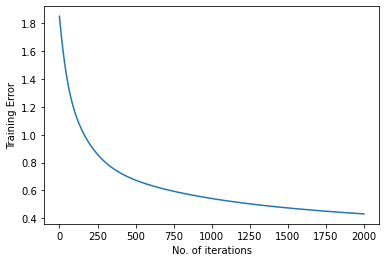

[1.8504774627483807, 1.838603402789892, 1.8268537672797807, 1.815228769267448, 1.8037285614072116, 1.792353236180699, 1.7811028262380246, 1.7699773049777194, 1.7589765872059104, 1.7481005298442582, 1.7373489327507015, 1.7267215397636684, 1.7162180396542253, 1.7058380673445295, 1.6955812050678225, 1.6854469837163135, 1.675434884191475, 1.6655443388607918, 1.6557747330461663, 1.6461254066110054, 1.6365956555434926, 1.627184733589868, 1.617891853982314, 1.6087161911073395, 1.5996568822791255, 1.590713029466657, 1.581883701081492, 1.5731679337255091, 1.564564734002181, 1.5560730802530625, 1.5476919243380172, 1.5394201933847436, 1.5312567915161674, 1.5232006015555277, 1.5152504867308139, 1.507405292306824, 1.4996638472274266, 1.492024965700177, 1.484487448750173, 1.4770500857285527, 1.4697116557886332, 1.4624709293092033, 1.4553266692816629, 1.4482776326422286, 1.4413225715612996, 1.4344602346825546, 1.4276893683187333, 1.4210087175853294, 1.4144170275038428, 1.407913044036576, 1.4014955150

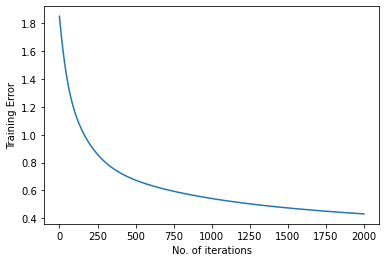

[1.8504774627483807, 1.838603402789892, 1.8268537672797807, 1.815228769267448, 1.8037285614072116, 1.792353236180699, 1.7811028262380246, 1.7699773049777194, 1.7589765872059104, 1.7481005298442582, 1.7373489327507015, 1.7267215397636684, 1.7162180396542253, 1.7058380673445295, 1.6955812050678225, 1.6854469837163135, 1.675434884191475, 1.6655443388607918, 1.6557747330461663, 1.6461254066110054, 1.6365956555434926, 1.627184733589868, 1.617891853982314, 1.6087161911073395, 1.5996568822791255, 1.590713029466657, 1.581883701081492, 1.5731679337255091, 1.564564734002181, 1.5560730802530625, 1.5476919243380172, 1.5394201933847436, 1.5312567915161674, 1.5232006015555277, 1.5152504867308139, 1.507405292306824, 1.4996638472274266, 1.492024965700177, 1.484487448750173, 1.4770500857285527, 1.4697116557886332, 1.4624709293092033, 1.4553266692816629, 1.4482776326422286, 1.4413225715612996, 1.4344602346825546, 1.4276893683187333, 1.4210087175853294, 1.4144170275038428, 1.407913044036576, 1.4014955150

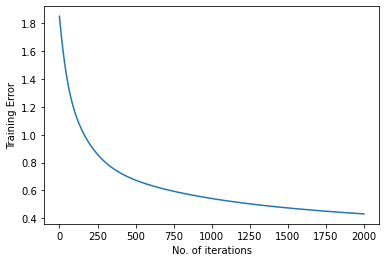

[1.8504774627483807, 1.838603402789892, 1.8268537672797807, 1.815228769267448, 1.8037285614072116, 1.792353236180699, 1.7811028262380246, 1.7699773049777194, 1.7589765872059104, 1.7481005298442582, 1.7373489327507015, 1.7267215397636684, 1.7162180396542253, 1.7058380673445295, 1.6955812050678225, 1.6854469837163135, 1.675434884191475, 1.6655443388607918, 1.6557747330461663, 1.6461254066110054, 1.6365956555434926, 1.627184733589868, 1.617891853982314, 1.6087161911073395, 1.5996568822791255, 1.590713029466657, 1.581883701081492, 1.5731679337255091, 1.564564734002181, 1.5560730802530625, 1.5476919243380172, 1.5394201933847436, 1.5312567915161674, 1.5232006015555277, 1.5152504867308139, 1.507405292306824, 1.4996638472274266, 1.492024965700177, 1.484487448750173, 1.4770500857285527, 1.4697116557886332, 1.4624709293092033, 1.4553266692816629, 1.4482776326422286, 1.4413225715612996, 1.4344602346825546, 1.4276893683187333, 1.4210087175853294, 1.4144170275038428, 1.407913044036576, 1.4014955150

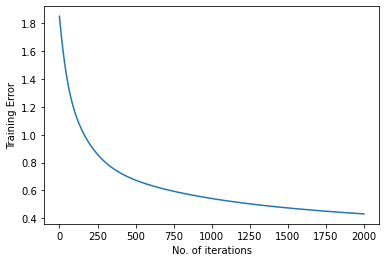

In [14]:
for param in grid:
  def train_model(X_train,y_train,X_val,y_val,param):
      np.random.seed(42)
      W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
      
      train_error=[]
      val_error=[]

      #Run the loop num_of_iteration times 
      for i in range(1,param['num_of_iteration']):
          z=np.matmul(X_train,W)      
          h_train = sigmoid(z)
          train_loss=BCE(h_train,y_train)     #loss in training data is calculated by calling BCE function
          #cross entropy
          train_error.append(train_loss)      #
          
          #Gradient-- Code form of the formula. shape[0] gives the number of rows
          gradient=np.matmul(X_train.T,(h_train-y_train))/X_train.shape[0]     
              
          #W is the updated weight
          W=W-param['learning_rate']*gradient
      
      #Once training is done. We have to use Val set to tune hyper parameter. 
      #The p(combination) that gives least error is our final value for hyperparameters.
      z_val=np.matmul(X_val,W)
      h_val=sigmoid(z_val)
      val_loss=BCE(h_val,y_val) 
      val_error.append(val_loss)
      return W, train_error, val_error
  Weights, train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         

  #Continue from here
  print(train_error)
  print('\n')                             
  print(val_error)
  plt.plot(np.arange(len(train_error)),train_error)
  plt.xlabel("No. of iterations")
  plt.ylabel("Training Error")
  plt.show()
  #plt.ylim(10**-5,10**-6)

[1.8504774627483807, 1.838603402789892, 1.8268537672797807, 1.815228769267448, 1.8037285614072116, 1.792353236180699, 1.7811028262380246, 1.7699773049777194, 1.7589765872059104, 1.7481005298442582, 1.7373489327507015, 1.7267215397636684, 1.7162180396542253, 1.7058380673445295, 1.6955812050678225, 1.6854469837163135, 1.675434884191475, 1.6655443388607918, 1.6557747330461663, 1.6461254066110054, 1.6365956555434926, 1.627184733589868, 1.617891853982314, 1.6087161911073395, 1.5996568822791255, 1.590713029466657, 1.581883701081492, 1.5731679337255091, 1.564564734002181, 1.5560730802530625, 1.5476919243380172, 1.5394201933847436, 1.5312567915161674, 1.5232006015555277, 1.5152504867308139, 1.507405292306824, 1.4996638472274266, 1.492024965700177, 1.484487448750173, 1.4770500857285527, 1.4697116557886332, 1.4624709293092033, 1.4553266692816629, 1.4482776326422286, 1.4413225715612996, 1.4344602346825546, 1.4276893683187333, 1.4210087175853294, 1.4144170275038428, 1.407913044036576, 1.4014955150

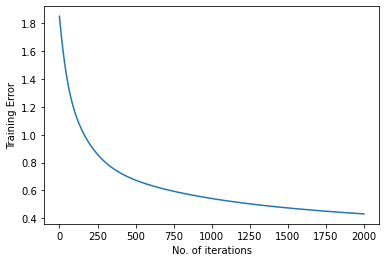

In [15]:
def train_model(X_train,y_train,X_val,y_val,param):
    np.random.seed(42)
    W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
    
    train_error=[]
    val_error=[]

    #Run the loop num_of_iteration times 
    for i in range(1,param['num_of_iteration']):
        z=np.matmul(X_train,W)      
        h_train = sigmoid(z)
        train_loss=BCE(h_train,y_train)     #loss in training data is calculated by calling BCE function
        #cross entropy
        train_error.append(train_loss)      #
        
        #Gradient-- Code form of the formula. shape[0] gives the number of rows
        gradient=np.matmul(X_train.T,(h_train-y_train))/X_train.shape[0]     
            
        #W is the updated weight
        W=W-param['learning_rate']*gradient
    
    #Once training is done. We have to use Val set to tune hyper parameter. 
    #The p(combination) that gives least error is our final value for hyperparameters.
    z_val=np.matmul(X_val,W)
    h_val=sigmoid(z_val)
    val_loss=BCE(h_val,y_val) 
    val_error.append(val_loss)
    return W, train_error, val_error
Weights, train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         

#Continue from here
print(train_error)
print('\n')                             
print(val_error)
plt.plot(np.arange(len(train_error)),train_error)
plt.xlabel("No. of iterations")
plt.ylabel("Training Error")
plt.show()
#plt.ylim(10**-5,10**-6)

In [0]:
final_param = {'num_of_iteration': 1000, 'learning_rate': 0.1}
model_weights, train_error, val_error = train_model(X_train,y_train,X_val,y_val,final_param)


In [0]:
prediction=np.dot(X_test,model_weights)

In [0]:
predict=list(map(lambda x: 0 if x<=0.5 else 1, prediction))

In [20]:
print('+ve in prediction  : ',predict.count(1)) # Positive Predictions
# print('+ve in test dataset: ',y_test.count(1))
print('-ve in prediction  : ',predict.count(0)) # Negative Predictions
# print('-ve in test dataset: ',y_test.count(0))

+ve in prediction  :  978
-ve in prediction  :  702


In [21]:
tp=fp=fn=tn=0

for i in range(len(predict)):
    if (predict[i]==1 and y_test[i]==1):
        tp+=1
    elif (predict[i]==1 and y_test[i]==0):
        fp+=1
    elif (predict[i]==0 and y_test[i]==1):
        fn+=1
    else:
        tn+=1

print('True Positive: {}\nFalse Positive: {}\nFalse Negative: {}\nTrue Negative: {}'.format(tp,fp,fn,tn))

True Positive: 770
False Positive: 208
False Negative: 316
True Negative: 386


In [23]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1=(2*precision*recall)/(precision+recall)
accuracy=(tp+tn)/(len(y_test))
specificity=tn/(tn+fp)
print('Precision\t: {}\nRecall\t\t: {}\nF1\t\t: {}\nAccuracy\t: {}'.format(precision,recall,f1,accuracy))

Precision	: 0.787321063394683
Recall		: 0.7090239410681399
F1		: 0.7461240310077519
Accuracy	: 0.6880952380952381
